This is suppose to be a quick (1 afternoon) application of a likelihood method to measure the effective popualtion of flu. We don't fix our neutrality assumption but it's a start. Here we don't assume a large Ne. So that's good.

If this goes forward I'll use the distribution of frequency from the benchmarking experiment for each titer, but for now I'll use the $10^4$ distribution. A normal distribution $\mu=0$, $\sigma^2=0.0002$, $\sigma = 0.014$ 

Addapting the set up in Williamsom and Slatkin we are after

$$
P(p_0,p_t|N_e) = \sum_{q_0,q_t}P(p_0|q_0)P(q_0|N_e)P(p_t|q_t)P(q_t|q_0,N_e)
$$

Where p are the observed probabilities and q are the real ones.

$$
P(p_x|q_x) = N(q_x,0.014)
$$

$$
P(q_0|N_e) = \frac{1}{N_e-1}
$$ 
as we are only looking at polymorphic sites

and 

$$
P(q_t|q_0,N_e) = v_0M^tv_t
$$

Where M is a square transmisssion matrix with $C=N+1$ rows and columns. Where $m_{i,j}$ is the probablilty of going from the ith configuration to the jth or the probability of drawing j out of binomial distirubution with mean $i/N_e$ and sample size $N_e$ and $v_0$ is a row vector of initial frequencies $q_0$ and $v_t$ is column vector of the frequencies at time point $t$ with 100% chance of the observed frequencies i.e. ( zeroes everywhere except the ith component =1 where $i/N_e = q_0$



### Modifying 

The summation terms are computationaly intense. I noticed that for a given q_0i and q_tj the term is 
$$
P(p_0|q_{0i})P(q_{0i}|N_e)[0 0 ... 1_i ... 0]M^t\begin{bmatrix}
    0 \\
    0 \\
    \vdots \\
    1_j \\
    \vdots \\
    0
\end{bmatrix} P(p_t|q_{tj})
$$


This can be simplified to 

$$
[0 0 ... P(p_0|q_{0i})P(q_{0i}|N_e) ... 0]M^t\begin{bmatrix}
    0 \\
    0 \\
    \vdots \\
    P(p_t|q_{tj}) \\
    \vdots \\
    0
\end{bmatrix} 
$$

Summing accross all i and j yeilds
$$
P(p_0,p_t|N_e) = [0, P(p_0|q_{02})P(q_{02}|N_e),  ...,  P(p_0|q_{0Ne-1})P(q_{0_Ne-1}|N_e), 0 ]M^t \begin{bmatrix}
    P(p_t|q_{t1}) \\
    \vdots \\
    P(p_t|q_{tNe})
\end{bmatrix} 
$$

Which is much more computationaly feasible. Linear algebra to the rescue!


In [1]:
addprocs(4)
@everywhere using Distributions
@everywhere  using DataFrames
@everywhere using Plots; pyplot()
@everywhere using ProgressMeter
@everywhere include("./Slatkin_functions.jl")

AbstractArray{T<:Any, 1}) in module Plots at /Users/jt/.julia/v0.5/Plots/src/utils.jl:414 overwritten in module Plots at /Users/jt/.julia/v0.5/Plots/src/utils.jl:414.


}, Any) in module Plots at /Users/jt/.julia/v0.5/RecipesBase/src/RecipesBase.jl:232 overwritten in module Plots at /Users/jt/.julia/v0.5/RecipesBase/src/RecipesBase.jl:232.


 at /Users/jt/.julia/v0.5/RecipesBase/src/RecipesBase.jl:232 overwritten in module Plots at /Users/jt/.julia/v0.5/RecipesBase/src/RecipesBase.jl:232.
, Union{Array{#F<:Function, 1}, #F<:Function, Array{#F<:Function, 2}}, Union{Array{#G<:Function, 2}, Array{#G<:Function, 1}, #G<:Function}, Union{Array{#H<:Function, 2}, #H<:Function, Array{#H<:Function, 1}}, Number, Number, Any) in module Plots at /Users/jt/.julia/v0.5/RecipesBase/src/RecipesBase.jl:232 overwritten in module Plots at /Users/jt/.julia/v0.5/RecipesBase/src/RecipesBase.jl:232.


Base.Dict{Symbol, Any}, Tuple{#R1<:Number, #R2<:Number}) in module Plots at /Users/jt/.julia/v0.5/RecipesBase/src/RecipesBase.jl:232 overwritten in module Plots at /Users/jt/.julia/v0.5/RecipesBase/src/RecipesBase.jl:232.
, Any}, AbstractArray{Tuple{#R1<:Number, #R2<:Number, #R3<:Number}, 1}) in module Plots at /Users/jt/.julia/v0.5/RecipesBase/src/RecipesBase.jl:232 overwritten in module Plots at /Users/jt/.julia/v0.5/RecipesBase/src/RecipesBase.jl:232.
 at /Users/jt/.julia/v0.5/RecipesBase/src/RecipesBase.jl:232 overwritten in module Plots at /Users/jt/.julia/v0.5/RecipesBase/src/RecipesBase.jl:232.
#R2<:Number, #R3<:Number, #R4<:Number}) in module Plots at /Users/jt/.julia/v0.5/RecipesBase/src/RecipesBase.jl:232 overwritten in module Plots at /Users/jt/.julia/v0.5/RecipesBase/src/RecipesBase.jl:232WARNING: Method definition .
apply_recipe(Base.Dict{Symbol, Any}, Union{Array{#F<:Function, 1}, Array{#F<:Function, 2}, #F<:Function}, Union{#G<:Function, Array{#G<:Function, 1}, Array{#G<

Float64}, Measures.Length{:pct, T<:Any}) in module Plots at /Users/jt/.julia/v0.5/Plots/src/layouts.jl:28 overwritten in module Plots at /Users/jt/.julia/v0.5/Plots/src/layouts.jl:28.
.Length{:mm, Float64}}) in module Plots at /Users/jt/.julia/v0.5/Plots/src/layouts.jl:16 overwritten in module Plots at /Users/jt/.julia/v0.5/Plots/src/layouts.jl:16.
 overwritten in module Plots at /Users/jt/.julia/v0.5/Plots/src/layouts.jl:96.


In [2]:
function write_to_summary(line_pattern,value)
    lines = []    
    sr = Regex("^$line_pattern.*")
    open("./results.table.tsv") do results
        for line in enumerate(eachline(results))
            line_s = line[2]
            if ismatch(sr,line_s)
            line_s = "$line_pattern\t$value\n"
            end
        push!(lines,line_s)
        end
    end
    open("./results.table.tsv","w") do output
        for l in lines
           write(output,"$l")
        end
    end
end



write_to_summary (generic function with 1 method)

## Test run

Here is the Density (likelihood?) for a variant starting at 15% in a population of 100 1 generation later.


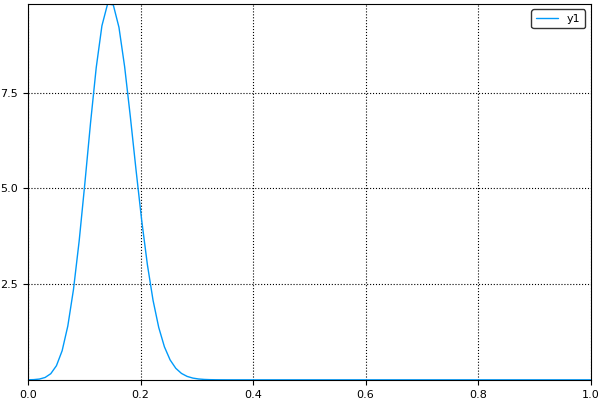

In [3]:
pₓ = linspace(0.0,1.0,100)

prob = zeros(length(pₓ))

p₀ = 0.15
Nₑ = 100
t = 1
for i in 1:length(pₓ)
    prob[i] = pTransition(pₓ[i],p₀,Nₑ,t)
end

prob
plot(pₓ,prob)

## Now 10 generations later


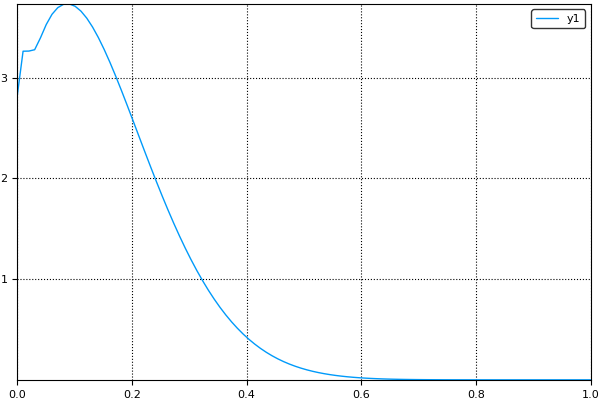

In [4]:
p₀ = 0.15
Nₑ = 100
t = 10
for i in 1:length(pₓ)
    prob[i] = pTransition(pₓ[i],p₀,Nₑ,t)
end

prob
plot(pₓ,prob)

# The real data

Here we read in the real data. We will only be using data points that were taken at least 1 day apart. Also we assume a generation time of 6 hrs or 4 generations in a day

In [5]:
data=readtable("./Intrahost_initially_present.csv")
minor = data[data[:freq1].<=0.5,:]
minor = minor[minor[:within_host_time].>0,:]
minor[:generations] = minor[:within_host_time]*4
minor

,x,HOUSE_ID,ENROLLID,season,onset,gc_ul_1,gc_ul_2,mutation,freq1,freq2,SPECID_1,SPECID_2,chr,ref,pos,var,within_host_time,donor_class,generations
1,2,5073,50319,2014-2015,2014-11-25,224616.057124778,654239.112547579,HA_A140G,0.0264987958706,0.0498634992657,HS1335,MH7612,HA,A,140,G,1,Synonymous,4
2,3,5033,50141,2014-2015,2014-12-03,1.09904707427442e6,9328.66776540432,HA_C236A,0.0251913260241,0.0,HS1376,MH7755,HA,C,236,A,1,Nonsynonymous,4
3,6,5070,50305,2014-2015,2014-12-05,31296.7324317693,93437.9191253739,HA_C273T,0.0511608590998,0.0,HS1416,MH7890,HA,C,273,T,3,Synonymous,12
4,8,5234,50993,2014-2015,2015-01-04,4.84046142881588e6,34583.56208775,HA_C418T,0.0315552982759,0.0,HS1595,MH8925,HA,C,418,T,3,Nonsynonymous,12
5,9,5039,50167,2014-2015,2014-12-27,3225.36866342537,20695.5542972638,HA_T491C,0.287317227262,0.0,HS1566,MH8700,HA,T,491,C,3,Synonymous,12
6,11,5341,51438,2014-2015,2014-12-07,238153.266798938,141146.054111149,HA_T524C,0.0588456364788,0.489384735077,HS1390,MH7852,HA,T,524,C,1,Synonymous,4
7,14,5126,50540,2014-2015,2014-12-06,9153.80335873375,2627.54866436138,HA_C545T,0.0680510202664,0.18189226088,HS1409,MH7886,HA,C,545,T,3,Synonymous,12
8,15,5341,51438,2014-2015,2014-12-07,238153.266798938,141146.054111149,HA_G638A,0.213904415309,0.0359769154235,HS1390,MH7852,HA,G,638,A,1,Synonymous,4
9,18,5228,50968,2014-2015,2014-12-06,59552.1759622025,2383.59539700922,HA_A879C,0.0341160572648,0.0,HS1401,MH7855,HA,A,879,C,1,Nonsynonymous,4
10,20,5129,50553,2014-2015,2014-11-16,2.82809610866543e6,8010.33563290432,HA_C995T,0.0380427122411,0.087795844906,HS1256,MH7391,HA,C,995,T,1,Synonymous,4


In [6]:
LL = zeros(100)
p = Progress(length(LL), 1)
for N in 1:100
    #println(N)
    LL[N]= LogLike(minor,N)
    next!(p)
end
Nₑ=findfirst(LL,maximum(LL,1)[1])
write_to_summary("Discrete model 6 Ne:",Nₑ)


Progress:  77%  ETA: 0:00:01
Progress: 100% Time: 0:00:04


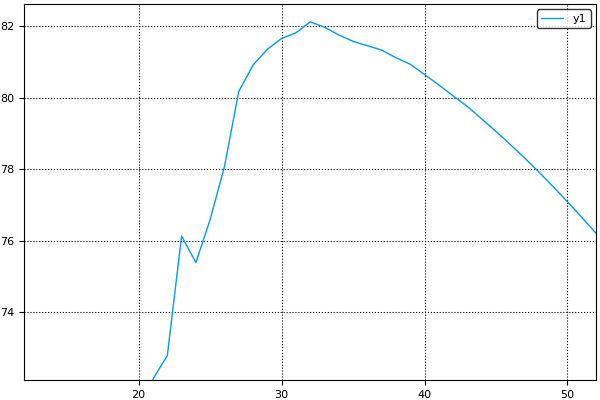

In [7]:
plot(Nₑ-20:Nₑ+20,LL[Nₑ-20:Nₑ+20],ylim=[LL[Nₑ]-10,LL[Nₑ]+0.5])

Hmmmm that curve looks a little odd but the result matches our expectation given the diffusion model. I bet it has something to do with the binomial nature and our PCR error spread affecting the likelihood of observing certain starting and ending frequencies. 

In [8]:
function CI_interval(LL,Nₑ)

f(x)= x >(LL[Nₑ]-1.92)

Ci = find(f,LL)
low = minimum(Ci,1)[1]
high = maximum(Ci,1)[1]
ci = "$low - $high"
    return(ci)
end

ci = CI_interval(LL,Nₑ)
write_to_summary("Discrete model 6 CI:",ci)

## Synonymous

In [9]:
S = minor[minor[:donor_class].=="Synonymous",:]
LL = zeros(100)
p = Progress(length(LL), 1)
for N in 1:100
    #println(N)
    LL[N]= LogLike(S,N)
    next!(p)
end
Nₑ=findfirst(LL,maximum(LL,1)[1])
print(Nₑ)
write_to_summary("S Ne:",Nₑ)

Progress: 100% Time: 0:00:02


37

In [10]:
ci = CI_interval(LL,Nₑ)
write_to_summary("S CI:" ,ci)


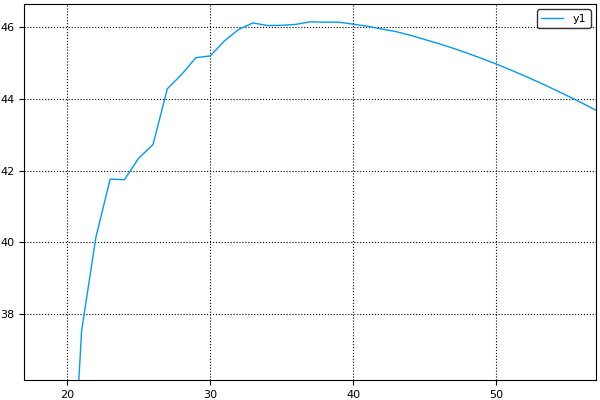

In [11]:
plot(Nₑ-20:Nₑ+20,LL[Nₑ-20:Nₑ+20],ylim=[LL[Nₑ]-10,LL[Nₑ]+0.5])


In [12]:
print(nrow(S))
synom_n = nrow(S)
write_to_summary("S iSNV n:",synom_n)

36

## Nonsynonymous

In [13]:
NS = minor[minor[:donor_class].=="Nonsynonymous",:]
LL = zeros(100)
p = Progress(length(LL), 1)
for N in 1:100
    #println(N)
    LL[N]= LogLike(NS,N)
    next!(p)
end
Nₑ=findfirst(LL,maximum(LL,1)[1])
write_to_summary("NS Ne:",Nₑ)

Progress: 100% Time: 0:00:02


In [14]:
ci = CI_interval(LL,Nₑ)
write_to_summary("NS CI:" ,ci)


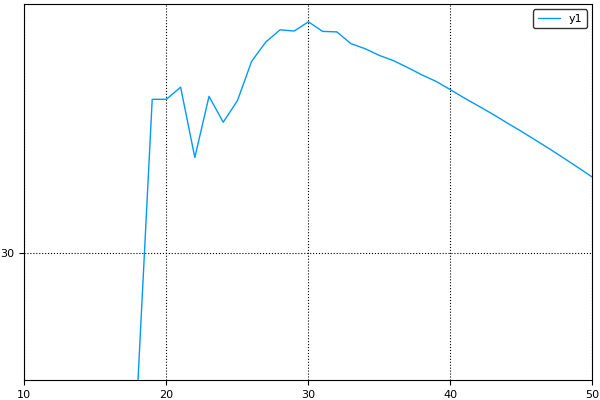

In [15]:
plot(Nₑ-20:Nₑ+20,LL[Nₑ-20:Nₑ+20],ylim=[LL[Nₑ]-10,LL[Nₑ]+0.5])



In [16]:
print(nrow(NS))
nonsynom_n = nrow(NS)
write_to_summary("NS iSNV n:",nonsynom_n)

27

## Randomly choose 1 iSNV / person

In [17]:
function sub_df(df)
    rows=nrow(df)
    pick = rand(1:rows)
    return(df[pick,:])
end



sub_df (generic function with 1 method)

In [18]:
runs = 1000
NₑFits = zeros(runs)
p = Progress(runs, 1)
maxN = 70
minN = 1
for i in 1:runs
    set = by(minor,:ENROLLID, d-> sub_df(d))
   NₑFits[i] = MLfit(set,minN,maxN)[1]
    if maxN==NₑFits[i]
        while maxN==NₑFits[i]
        println("increasing window")
        maxN +=50
        minN +=50
        NₑFits[i] = MLfit(set,minN,maxN)[1]
        end
    end
    next!(p)
end

Progress: 100% Time: 0:05:37


In [19]:
N1per = DataFrame(Ne=NₑFits,iteration = 1:runs)
writetable("./one_per_person.csv",N1per)

write_to_summary("Subset median 6 Ne:",median(NₑFits))

range = quantile(NₑFits,[0.25,0.75]) 

write_to_summary("Subset IQR 6 Ne:",range)

# Sensitivity to outliers


In [20]:
minor[:delta] = -1*abs(minor[:freq1] - minor[:freq2]) ./ minor[:generations] # So the most extreme is on top of the order
minorOrdered = sort!(minor,cols = order(:delta,))

,x,HOUSE_ID,ENROLLID,season,onset,gc_ul_1,gc_ul_2,mutation,freq1,freq2,SPECID_1,SPECID_2,chr,ref,pos,var,within_host_time,donor_class,generations,delta
1,77,5341,51438,2014-2015,2014-12-07,238153.266798938,141146.054111149,NS_T538C,0.0487008376097,0.48757896261,HS1390,MH7852,NS,T,538,C,1,Nonsynonymous,4,-0.109719531250075
2,66,5204,50874,2014-2015,2014-12-05,1446.10996315801,21196.4885031859,NR_A501G,0.0331706001001,0.467637282551,HS1381,MH7800,NR,A,501,G,1,Nonsynonymous,4,-0.10861667061272501
3,11,5341,51438,2014-2015,2014-12-07,238153.266798938,141146.054111149,HA_T524C,0.0588456364788,0.489384735077,HS1390,MH7852,HA,T,524,C,1,Synonymous,4,-0.10763477464955
4,134,5204,50874,2014-2015,2014-12-05,1446.10996315801,21196.4885031859,PB1_G1798G,0.178816730614,0.443234092666,HS1381,MH7800,PB1,G,1798,G,1,Synonymous,4,-0.066104340513
5,113,5204,50874,2014-2015,2014-12-05,1446.10996315801,21196.4885031859,PB1_G530A,0.25351760292,0.473359560691,HS1381,MH7800,PB1,G,530,A,1,Nonsynonymous,4,-0.054960489442750005
6,109,5341,51438,2014-2015,2014-12-07,238153.266798938,141146.054111149,PB1_G430A,0.220772809253,0.0396486125248,HS1390,MH7852,PB1,G,430,A,1,Synonymous,4,-0.04528104918205
7,15,5341,51438,2014-2015,2014-12-07,238153.266798938,141146.054111149,HA_G638A,0.213904415309,0.0359769154235,HS1390,MH7852,HA,G,638,A,1,Synonymous,4,-0.044481874971375
8,139,5204,50874,2014-2015,2014-12-05,1446.10996315801,21196.4885031859,PB2_G212A,0.302404459968,0.470121801684,HS1381,MH7800,PB2,G,212,A,1,Nonsynonymous,4,-0.041929335429
9,130,5204,50874,2014-2015,2014-12-05,1446.10996315801,21196.4885031859,PB1_A1705G,0.296343011523,0.461350779373,HS1381,MH7800,PB1,A,1705,G,1,Synonymous,4,-0.0412519419625
10,117,5254,51073,2014-2015,2014-12-20,4.52234282269474e6,21881.0520421267,PB1_T910A,0.340472493385,0.0421432505725,HS1505,MH8391,PB1,T,910,A,2,Synonymous,8,-0.0372911553515625


In [21]:
Nₑ = zeros(nrow(minor))
p = Progress(nrow(minor), 1)
maxN = 70
minN = 1
for i in 1:nrow(minor)
    if maxN>450
        break
    end
    Nₑ[i] = MLfit(minor[i:nrow(minor),:],minN,maxN)[1]
    if maxN==Nₑ[i]
        while maxN==Nₑ[i]
        maxN +=50
        minN +=50
        if maxN>450
            break
        end
        Nₑ[i] = MLfit(minor[i:nrow(minor),:],minN,maxN)[1]
        end
    end
    next!(p)
end

Progress:  89%  ETA: 0:00:28

In [22]:
Nₑ

63-element Array{Float64,1}:
  32.0
  32.0
  40.0
  48.0
  50.0
  51.0
  54.0
  56.0
  57.0
  58.0
  62.0
  65.0
  69.0
   ⋮  
 301.0
 301.0
 301.0
 301.0
 420.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0

[32.0,32.0,40.0,48.0,50.0,51.0,54.0,56.0,57.0,58.0,62.0,65.0,69.0,70.0,77.0,93.0,108.0,110.0,118.0,117.0,114.0,113.0,112.0,118.0,123.0,143.0,149.0,154.0,159.0,152.0,157.0,161.0,153.0,145.0,159.0,162.0,184.0,172.0,161.0,183.0,169.0,155.0,180.0,252.0,240.0,213.0,201.0,349.0,301.0,301.0,301.0,301.0,301.0,301.0,301.0,420.0]
[55]



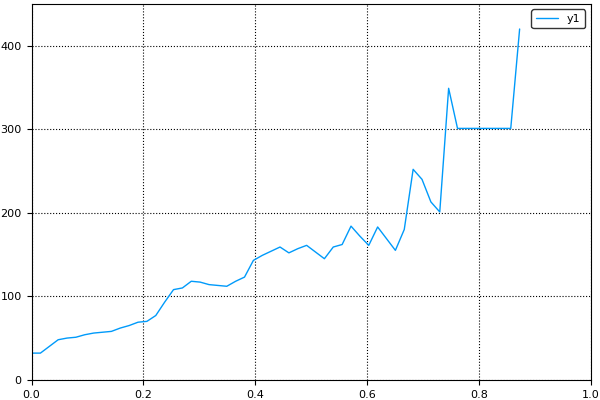

[0.873016]


In [23]:
N=Nₑ[Nₑ.>0]
println(N)

x = 0:(length(N)-1) 
println(maximum(x,1))
x = x./nrow(minor)

println(maximum(x,1))

Ndf = DataFrame(Ne=N,removed = x)
writetable("./removed_data.csv",Ndf)

plot(x,N,xlim = [0,1],ylim = [0,450])

## Simulations 

Ok the goal here is to simulate drift using our starting points and time intervals over a number of different effective populations sizes. We will then estimate the $N\_e$ from those simulations and check our accuracy.

At this point I will round the initial frequency to the nearest available frequency above 0.

This is now run in the separate script in the script directory.


# Generation = 12 hours

In [24]:
minor[:generations] = minor[:within_host_time]*2


LL = zeros(100)
p = Progress(length(LL), 1)
for N in 1:100
    #println(N)
    LL[N]= LogLike(minor,N)
    next!(p)
end
Nₑ=findfirst(LL,maximum(LL,1)[1])
write_to_summary("Discrete model 12 Ne:",Nₑ)

Progress:  84%  ETA: 0:00:00
Progress: 100% Time: 0:00:03


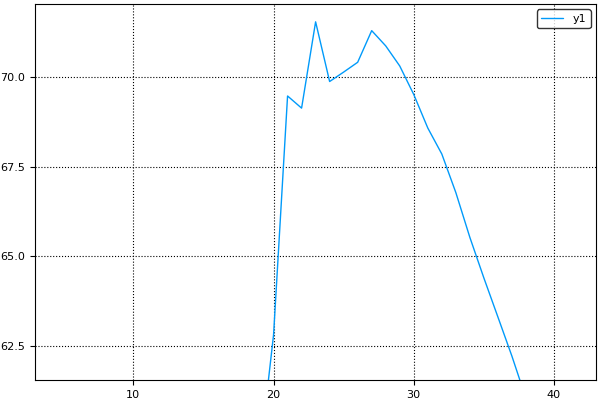

In [25]:
plot(Nₑ-20:Nₑ+20,LL[Nₑ-20:Nₑ+20],ylim=[LL[Nₑ]-10,LL[Nₑ]+0.5])

Hmmmm that curve looks a little odd but the result matches our expectation given the diffusion model. I bet it has something to do with the binomial nature and our PCR error spread affecting the likelihood of observing certain starting and ending frequencies. 

In [26]:
ci = CI_interval(LL,Nₑ)
write_to_summary("Discrete model 12 CI:",ci)

## Synonymous

In [27]:
S = minor[minor[:donor_class].=="Synonymous",:]
LL = zeros(100)
p = Progress(length(LL), 1)
for N in 1:100
    #println(N)
    LL[N]= LogLike(S,N)
    next!(p)
end
Nₑ=findfirst(LL,maximum(LL,1)[1])
print(Nₑ)
write_to_summary("S Ne 12:",Nₑ)

Progress: 100% Time: 0:00:02


27

In [28]:
ci = CI_interval(LL,Nₑ)
write_to_summary("S CI 12:",ci)


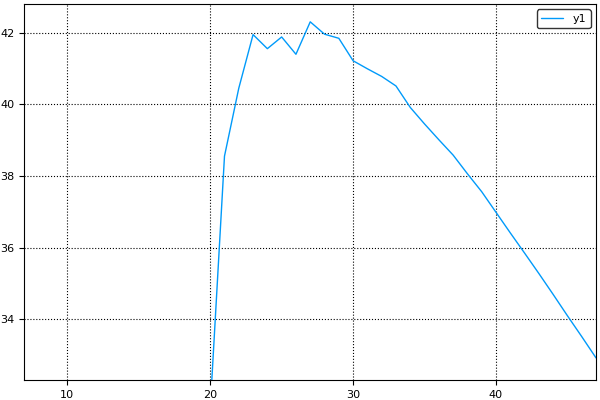

In [29]:
plot(Nₑ-20:Nₑ+20,LL[Nₑ-20:Nₑ+20],ylim=[LL[Nₑ]-10,LL[Nₑ]+0.5])


In [30]:
print(nrow(S))

36

## Nonsynonymous

In [31]:
NS = minor[minor[:donor_class].=="Nonsynonymous",:]
LL = zeros(100)
p = Progress(length(LL), 1)
for N in 1:100
    #println(N)
    LL[N]= LogLike(NS,N)
    next!(p)
end
Nₑ=findfirst(LL,maximum(LL,1)[1])
write_to_summary("NS Ne 12:",Nₑ)

Progress: 100% Time: 0:00:01


In [32]:
ci = CI_interval(LL,Nₑ)
write_to_summary("NS CI 12",ci)


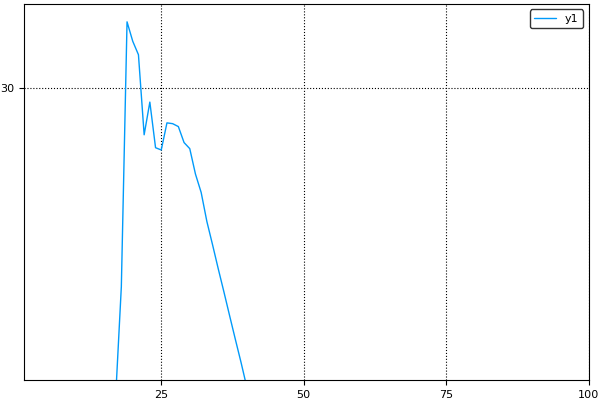

In [33]:
plot(LL,ylim=[LL[Nₑ]-10,LL[Nₑ]+0.5])
